In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
purchase_histroy_df = pd.read_csv("Dataset/purchase_histroy.csv")
vendor_toronto_df = pd.read_csv("Dataset/vendor_toronto.csv")

In [3]:
# purchase_histroy_df.drop(columns= ["Unnamed: 0"], inplace= True)
purchase_histroy_df.head()

,Transaction_ID,Vendor_ID,Ingredient Name,Quantity,Amount
0,198182,90176,Egg,71,1207
1,412374,92758,Bread,95,475
2,127945,64020,Rye Bread,95,1140
3,338155,70335,Wheaten Bread,66,660
4,716384,41611,White Bread,10,150


In [4]:
# vendor_toronto_df.drop(columns= ["Unnamed: 0"], inplace= True)
vendor_toronto_df.head()

,Vendor_ID,Vendor_Name,Location
0,90176,Jackson LLC,Scarborough
1,92758,"Shepherd, Schultz and Edwards",Casa Loma
2,64020,Williams Inc,Bloorcourt Village
3,70335,Noble Group,Scarborough
4,41611,Lopez-Wilkinson,Art Gallery of Ontario


# EDA

In [41]:
max_quantity_row = purchase_histroy_df.loc[purchase_histroy_df['Quantity'].idxmax()]

second_max_amount_row = purchase_histroy_df.nlargest(2, 'Amount').iloc[1]

max_ratio_row = purchase_histroy_df.loc[(purchase_histroy_df['Amount'] / purchase_histroy_df['Quantity']).idxmax()]

# Display the results
print("Row with Maximum Quantity:")
print(max_quantity_row)
print("\nSecond Row with Maximum Amount:")
print(second_max_amount_row)
print("\nRow with Maximum Amount/Quantity Ratio:")
print(max_ratio_row)

Row with Maximum Quantity:
Transaction_ID        845135
Vendor_ID              93410
Ingredient Name    Woodapple
Quantity                 100
Amount                   900
Name: 216, dtype: object

Second Row with Maximum Amount:
Transaction_ID          449245
Vendor_ID                  518
Ingredient Name    Mustard Oil
Quantity                    97
Amount                    1940
Name: 312, dtype: object

Row with Maximum Amount/Quantity Ratio:
Transaction_ID               406345
Vendor_ID                      3505
Ingredient Name    Wholewheat Bread
Quantity                         46
Amount                          920
Name: 5, dtype: object


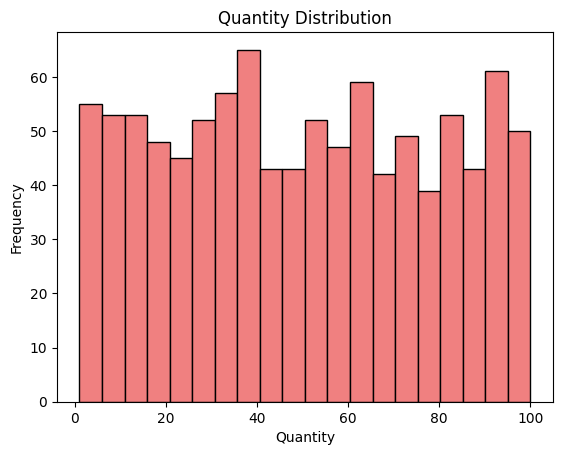

In [10]:
plt.hist(purchase_histroy_df['Quantity'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [69]:
temp_df = purchase_histroy_df.groupby('Transaction_ID')
temp_df = temp_df.sum().nlargest(10, 'Amount')

In [70]:
temp_df

,Vendor_ID,Ingredient Name,Quantity,Amount
Transaction_ID,,,,
706775,162305,Pear BrandyAdzuki beanBurbotMilkshakeNanking c...,416,6054
924217,81336,CodfishMacaroniLemon verbenaBorageGelatin dess...,355,5237
491384,532908,Camembert CheeseLean FishCreosoteWalleyeQuailTofu,328,5147
216202,173408,OpossumRinged sealSesbania flowerCake Mix,301,4864
748922,245130,Milk PowderLemon BalmPecansLingcodDeerColeslaw,299,4472
559268,455745,Weinbrand BrandyGingerSnack barFettuccineTuna,316,4342
746164,53250,FishTurnipSunflowerRainbow smeltRowal,291,4229
797731,467050,RiceMarjoramBottlegourdPainted comberFalafel,309,3883
307325,282935,ApricotOliveCarobDrag̩eChinese bayberry,270,3863


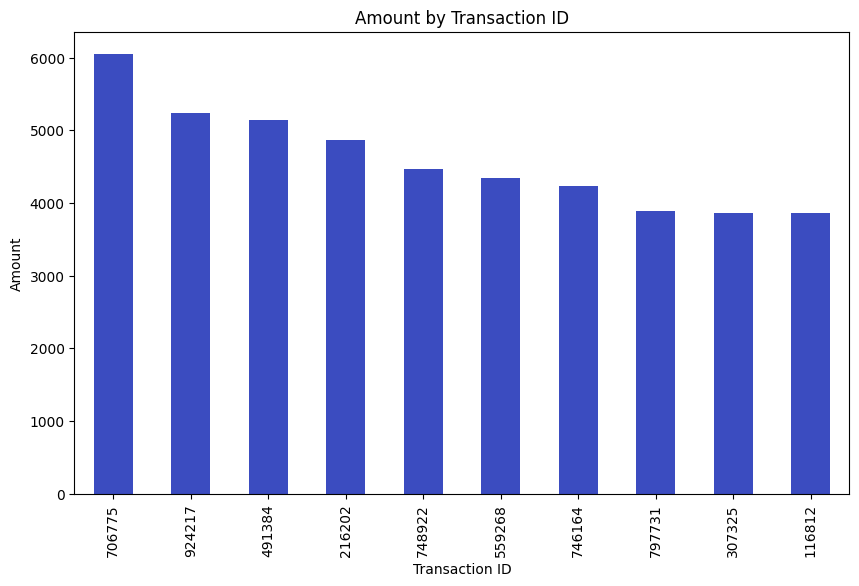

In [85]:
fig, axes = plt.subplots(figsize=(10, 6))

temp_df.plot(kind='bar', y='Amount', ax=axes, colormap='coolwarm', legend=False)
axes.set_title('Amount by Transaction ID')
axes.set_xlabel('Transaction ID')
axes.set_ylabel('Amount')
plt.show()

In [87]:
temp_df = purchase_histroy_df.groupby('Transaction_ID')
temp_df = temp_df.sum().nlargest(10, 'Quantity')

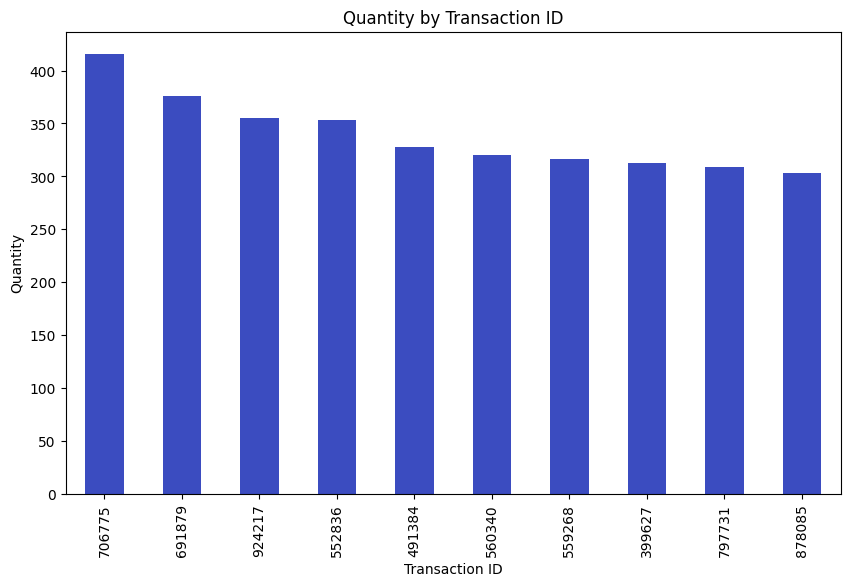

In [88]:
fig, axes = plt.subplots(figsize=(10, 6))

temp_df.plot(kind='bar', y='Quantity', ax=axes, colormap='coolwarm', legend=False)
axes.set_title('Quantity by Transaction ID')
axes.set_xlabel('Transaction ID')
axes.set_ylabel('Quantity')
plt.show()